In [67]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, pearsonr, spearmanr

In [68]:
train_data = pl.read_csv("./data/training_data.csv")

## Exploratory Data Analysis

### Data description

In [ ]:
# just to understand in a high level the basic statistics of the dataset
train_data.describe()

statistic,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,target
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",468.181612,301.960218,317.132996,283.213456,485.97595,320.953859,217.13633,387.196289,179.485453,196.003058,401.079696,3.372667,479.841915,100.112096,28.334725,277.205999,91.217615,70.927129,27.385266,457.016407,14.631342
"""std""",270.797415,170.691136,176.50192,157.698215,272.59403,185.157189,123.660691,235.131376,104.059309,111.042671,228.533579,1.986369,276.304197,59.149794,16.105155,167.38593,53.950523,40.588905,15.509062,270.650146,5.089503
"""min""",0.916648,0.800119,0.173025,0.308823,0.598527,0.997347,0.402436,0.474825,0.72785,0.264253,1.487605,0.004464,1.70624,0.194306,0.222312,1.726915,0.093789,0.072986,0.101761,0.252919,0.279805
"""25%""",240.004227,158.112763,167.572641,152.774098,250.440497,158.461761,106.935943,195.957824,94.452115,95.254095,200.565918,1.632165,250.287401,48.172929,14.692436,131.724471,44.410583,34.908806,13.81563,221.90531,10.880143
"""50%""",478.132491,303.663848,326.433636,294.986019,494.098314,328.754429,217.39164,364.208796,173.435824,200.074749,414.590211,3.351479,468.769999,100.324315,28.011475,276.142203,87.76045,74.479882,27.813702,462.790607,14.704889
"""75%""",704.493682,448.326791,474.434225,415.608904,720.679939,480.036988,327.144941,587.860394,268.758386,291.459052,613.318384,5.018215,713.208154,149.792485,42.50572,423.087972,137.821739,105.478175,40.401609,688.029902,18.220644
"""max""",940.771543,595.359858,614.271632,549.896216,950.017444,638.199832,426.308251,809.346792,367.084755,384.919108,767.311089,6.859269,979.715063,203.122292,56.467485,566.611509,187.041256,138.675389,53.25474,935.740775,27.360789


In [70]:
train_data.head()

feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,target
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
432.475954,289.373016,481.3156,358.755566,802.659004,176.761177,72.648102,720.969179,36.327684,83.768878,659.390923,4.385848,516.789458,19.624422,13.16244,42.351948,35.920392,20.755984,13.8143,384.497136,14.364922
517.59625,330.448341,585.920055,22.684031,169.81324,335.60164,284.451476,748.101047,73.701438,358.147215,11.036952,5.563334,2.960064,20.721878,17.740184,1.726915,167.576065,75.492679,2.480979,303.710869,19.984801
189.43935,553.88882,165.83379,202.465927,176.695586,321.155049,407.278389,161.245668,282.269025,221.570899,143.919562,4.536947,581.823741,101.695639,0.653592,486.859084,117.491548,6.420465,20.713314,22.651537,12.944351
237.307878,195.894881,416.752252,468.729031,611.693517,301.411711,241.880655,49.597044,122.396821,13.828319,677.161907,5.518968,45.014729,196.350455,47.638515,411.414213,67.142022,115.630943,8.927957,388.240433,14.79244
602.845256,16.103208,221.759979,345.765574,558.588369,276.704241,408.069566,19.390813,138.769765,146.662193,311.747565,2.136214,133.59043,197.634584,26.278027,111.127557,172.181136,85.869642,30.537857,625.931837,11.802634


In [ ]:
# separate the features from the target
features = train_data.drop("target")
target = train_data.get_column("target")

### Feature analysis

/var/folders/wj/_wkdntf14_3d9wfq80151hjc0000gp/T/ipykernel_4092/958038786.py:3: DeprecationWarning: `DataFrame.melt` is deprecated; use `DataFrame.unpivot` instead, with `index` instead of `id_vars` and `on` instead of `value_vars`
  df_melted = dataframe.melt(variable_name="feature", value_name="value")


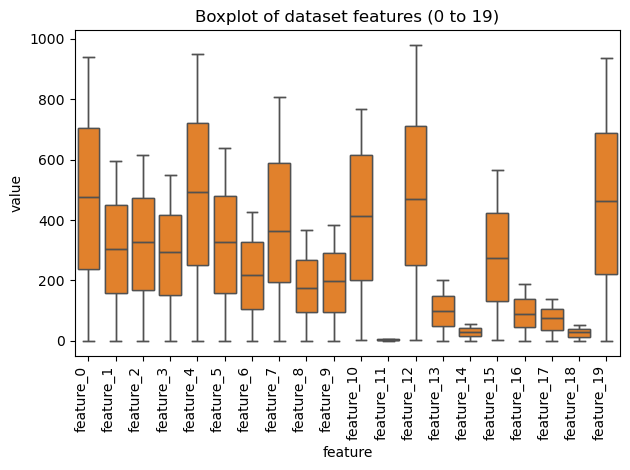

In [ ]:
# function to plot all the features in a single boxplot
def box_plot_features(dataframe, name="boxplot_features"):
    # to plot all features in a single boxplot we have to transform from wide to long format
    df_melted = dataframe.melt(variable_name="feature", value_name="value")
    for feature in df_melted.columns:
        sns.boxplot(x="feature", y="value", data=df_melted)
        plt.xticks(rotation=90, ha='right')
        plt.title("Boxplot of dataset features (0 to 19)")
        plt.tight_layout()
        plt.savefig(f"plots/boxplots/{name}.png", dpi=250)

box_plot_features(features, name="boxplot_features")

In [ ]:
# function to generate the histogram of every feature
def histogram_feature(dataframe, column, save=False, clear=True):
    sns.histplot(x=dataframe.get_column(column), bins=25, kde=True)
    plt.title(f"Distribution of {column} variable")
    plt.ylabel("Frequency")
    if save:
        plt.savefig(f"plots/histograms/{column}.png", dpi=250)
    if clear:
        plt.clf()

for feature in features.columns:
    histogram_feature(features, feature, True)

<Figure size 640x480 with 0 Axes>

### Multicollinearity

In [ ]:
# features.corr help us to calculate the correlation between variables of a dataframe
corr_matrix = features.corr()


high_corr_pairs = []
mod_corr_pairs = []

for i in range(len(features.columns)):
    for j in range(i+1, len(features.columns)):
        corr_val = corr_matrix[i, j]
        # this threshold indicates that is highly correlated
        if abs(corr_val) > 0.9:
            high_corr_pairs.append((features[i], features[j], corr_val))
        else
            # this treshold indicates that is moderate correlated
            if abs(corr_val) > 0.7:
                mod_corr_pairs.append((features[i], features[j], corr_val))

print(high_corr_pairs)
print(mod_corr_pairs)

[]
[]


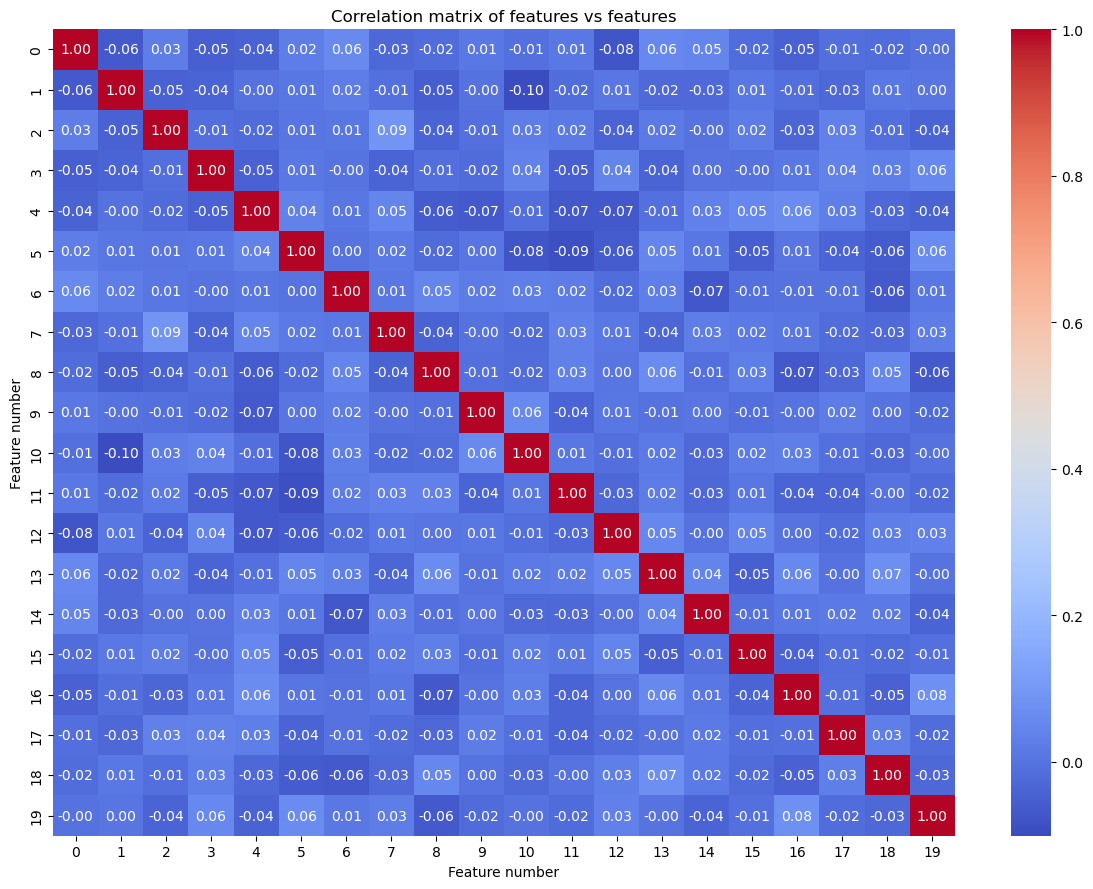

In [80]:
# heatmap of correlation matrix between features
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation matrix of features vs features")
plt.xlabel("Feature number")
plt.ylabel("Feature number")
plt.tight_layout()
plt.savefig(f"plots/features_correlation_matrix.png", dpi=250)

### Target variable analysis

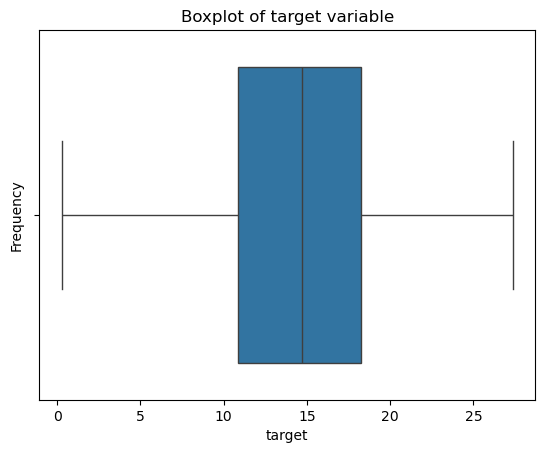

In [ ]:
# function to generate the boxplot of the target variable
def box_plot_target(dataframe, name="boxplot_target"):
    sns.boxplot(x=dataframe)
    plt.title("Boxplot of target variable")
    plt.ylabel("Frequency")
    plt.savefig(f"plots/boxplots/{name}.png", dpi=250)

box_plot_target(target, name="boxplot_target")


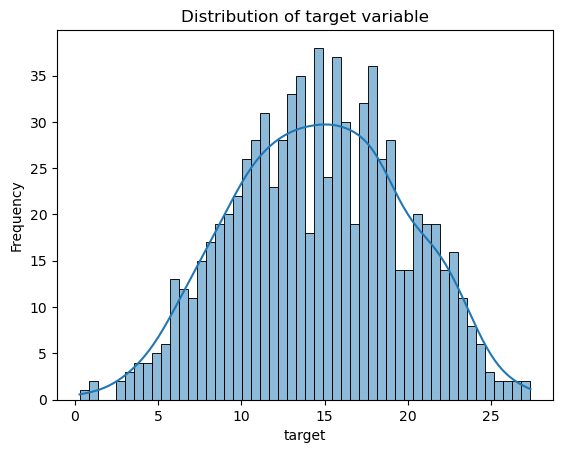

In [ ]:
# function to generate the histogram of the target variable
def histogram_target(dataframe, name="histogram_target"):
    sns.histplot(x=dataframe, bins=50, kde=True)
    plt.title("Distribution of target variable")
    plt.ylabel("Frequency")
    plt.savefig(f"plots/histograms/{name}.png", dpi=250)

histogram_target(target, name="histogram_target")

#### Basic statistics about target

In [55]:
print(f"Mean: {target.mean()}")
print(f"Median: {target.median()}")
print(f"Std: {target.std()}")
print(f"Min: {target.min()}")
print(f"Max: {target.max()}")
print(f"Skewness: {skew(target)}")
print(f"Kurtosis: {kurtosis(target)}")

Mean: 14.631342469771948
Median: 14.687954871021542
Std: 5.089503160430333
Min: 0.27980476856726666
Max: 27.36078858622054
Skewness: -0.039763559380179496
Kurtosis: -0.5443070354139121


### Correlation analysis bewteen target and features

In [ ]:
# we can calculate the pearson correlation to check the linear association between the variables and the target
pearson_corr = {}

for feature in features.columns:
    corr, _ = pearsonr(features.get_column(feature), target)
    pearson_corr[feature] = corr

pearson_sorted = sorted(pearson_corr.items(), key=lambda value: abs(value[1]), reverse=True)
pearson_sorted

[('feature_2', np.float64(0.5517672784131078)),
 ('feature_13', np.float64(0.40469663258241195)),
 ('feature_9', np.float64(0.3619417997598935)),
 ('feature_11', np.float64(0.3228021537283343)),
 ('feature_4', np.float64(-0.06267162298736874)),
 ('feature_18', np.float64(0.060052024602354453)),
 ('feature_19', np.float64(-0.053463656970208454)),
 ('feature_1', np.float64(-0.047162132075458246)),
 ('feature_10', np.float64(0.0454853660879517)),
 ('feature_6', np.float64(0.04444320609323866)),
 ('feature_7', np.float64(0.041089084221197725)),
 ('feature_14', np.float64(0.034944067866322995)),
 ('feature_0', np.float64(0.03410096968228534)),
 ('feature_12', np.float64(0.02965066686928704)),
 ('feature_17', np.float64(-0.02426842618593407)),
 ('feature_3', np.float64(-0.016788585090189753)),
 ('feature_8', np.float64(0.009972832504335756)),
 ('feature_16', np.float64(-0.0038877664730392406)),
 ('feature_15', np.float64(-0.0006419341520145123)),
 ('feature_5', np.float64(0.00031182604996084

In [ ]:
# we can calculate the spearman correlation to measure the order/ranking associations (better when handling outliers)
spearman_corr = {}

for feature in features.columns:
    corr, _ = spearmanr(features.get_column(feature), target)
    spearman_corr[feature] = corr

spearman_sorted = sorted(spearman_corr.items(), key=lambda value: abs(value[1]), reverse=True)
spearman_sorted

[('feature_2', np.float64(0.5434417319402062)),
 ('feature_13', np.float64(0.4023618943154599)),
 ('feature_9', np.float64(0.36773858240403506)),
 ('feature_11', np.float64(0.31745976946838983)),
 ('feature_18', np.float64(0.07063032910988924)),
 ('feature_4', np.float64(-0.06257979309342672)),
 ('feature_19', np.float64(-0.05657908059231343)),
 ('feature_1', np.float64(-0.04942531160204938)),
 ('feature_6', np.float64(0.045419156904932666)),
 ('feature_7', np.float64(0.03914633460364782)),
 ('feature_0', np.float64(0.03819153623677537)),
 ('feature_10', np.float64(0.038060473531989894)),
 ('feature_14', np.float64(0.032809785640290065)),
 ('feature_12', np.float64(0.026917495183586226)),
 ('feature_17', np.float64(-0.02552242269128546)),
 ('feature_3', np.float64(-0.01893312333300521)),
 ('feature_8', np.float64(0.015048515700805785)),
 ('feature_16', np.float64(-0.008279919187373731)),
 ('feature_5', np.float64(-0.005523407067823544)),
 ('feature_15', np.float64(0.0032128643951006173

### Scatters of highly correlated features with target

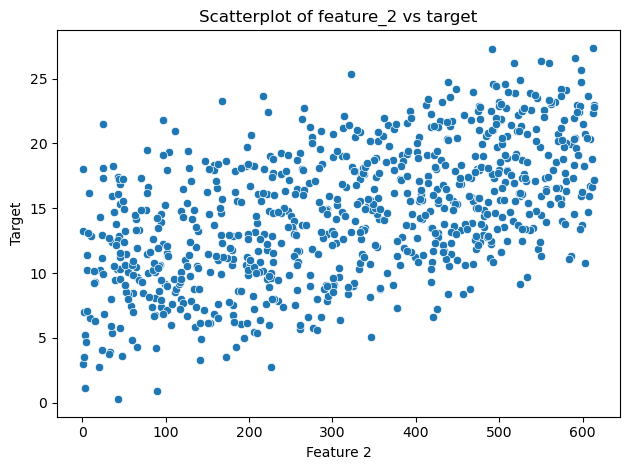

In [50]:
def scatter_feature_target(x, y, save=True):
    sns.scatterplot(x=x, y=y)
    plt.xlabel("Feature 2")
    plt.ylabel("Target")
    plt.title(f"Scatterplot of {x.name} vs {target.name}")
    plt.tight_layout()
    if save:
        plt.savefig(f"plots/scatters/{x.name}_vs_{y.name}.png")

scatter_feature_target(features.get_column("feature_2"), target)

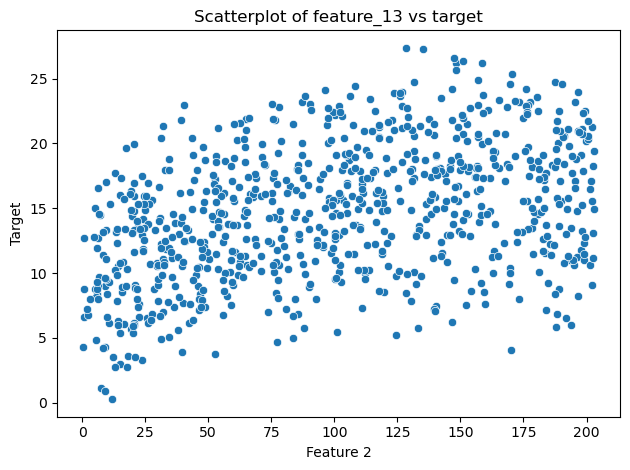

In [51]:
scatter_feature_target(features.get_column("feature_13"), target)

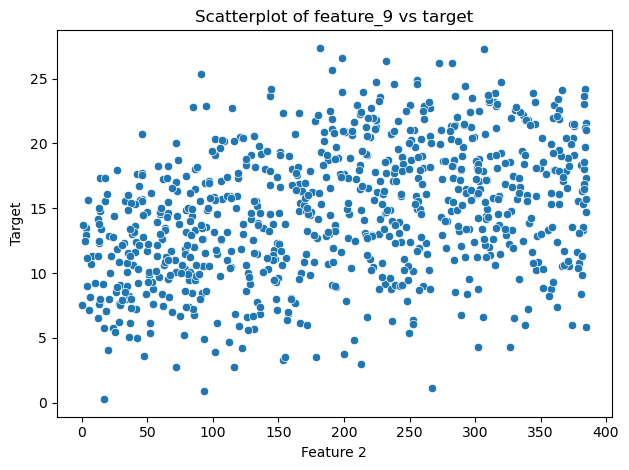

In [52]:
scatter_feature_target(features.get_column("feature_9"), target)

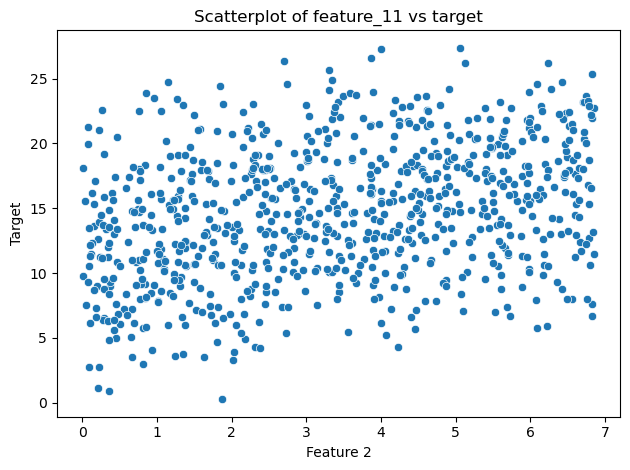

In [53]:
scatter_feature_target(features.get_column("feature_11"), target)